# 🌲 Random Forest: Siła Tłumu (Ensemble Learning)

W poprzednich lekcjach używaliśmy jednego modelu (jednego Drzewa).
Problem z jednym drzewem jest taki, że łatwo popada w skrajności. Jeśli dane są trochę zaszumione, drzewo wariuje.

**Rozwiązanie: Ensemble Learning (Zespoły).**
Zamiast pytać jednego eksperta, pytamy 100 ekspertów i robimy głosowanie.

**Random Forest (Las Losowy)** to algorytm, który:
1.  Tworzy 100 (lub więcej) drzew decyzyjnych.
2.  Każde drzewo uczy się na **innym, losowym fragmencie danych** (to się nazywa *Bootstrapping*).
3.  Każde drzewo widzi tylko **losowe kolumny** (nie widzi całego obrazka).
4.  Na koniec: **Głosowanie Większościowe**.

Dzięki temu błędy pojedynczych drzew się niwelują.

--- DANE TRENINGOWE ---


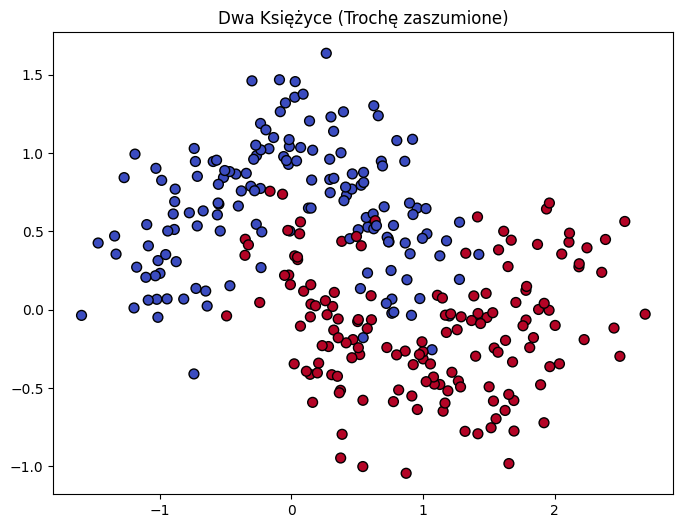

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. GENERUJEMY TRUDNE DANE (Księżyce - Moons)
# To dane nieliniowe. Prostą kreską tego nie rozdzielisz.
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

print("--- DANE TRENINGOWE ---")
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Dwa Księżyce (Trochę zaszumione)")
plt.show()

## Pojedynek: Samotne Drzewo vs Las

Teraz wytrenujemy dwa modele:
1.  **Samotne Drzewo:** Pozwolimy mu rosnąć bez ograniczeń. Zobaczysz, jak bardzo "szarpana" będzie jego granica decyzyjna (Overfitting).
2.  **Random Forest:** Zespół 100 drzew. Zobaczysz, jak gładka i płynna będzie jego decyzja.

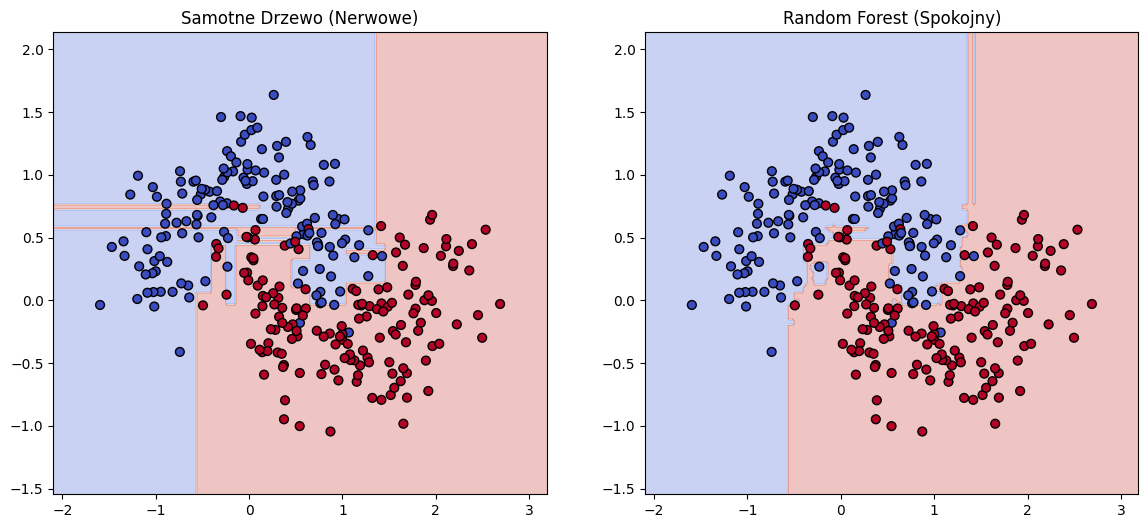

In [2]:
# Funkcja pomocnicza do rysowania granic decyzji (Nie musisz jej analizować w 100%)
def plot_decision_boundary(model, X, y, title):
    # Tworzymy siatkę punktów (tło wykresu)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Model przewiduje tło
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Rysujemy
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
    plt.title(title)

# --- MODEL 1: SAMOTNE DRZEWO ---
tree_clf = DecisionTreeClassifier(random_state=42) # Bez ograniczeń głębokości!
tree_clf.fit(X, y)

# --- MODEL 2: RANDOM FOREST (100 DRZEW) ---
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X, y)

# --- PORÓWNANIE WIZUALNE ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_decision_boundary(tree_clf, X, y, "Samotne Drzewo (Nerwowe)")

plt.subplot(1, 2, 2)
plot_decision_boundary(forest_clf, X, y, "Random Forest (Spokojny)")

plt.show()

## Analiza Wykresów

Spójrz na obrazek powyżej.

1.  **Samotne Drzewo (Po lewej):**
    *   Widzisz te dziwne, kanciaste "wyspy" i wąskie paski?
    *   Drzewo próbuje na siłę otoczyć każdą pojedynczą niebieską kropkę, która wpadła w czerwony obszar (szum).
    *   To klasyczny **Overfitting**. Na nowych danych to drzewo by poległo.

2.  **Random Forest (Po prawej):**
    *   Granica jest gładka, zaokrąglona.
    *   Algorytm ignoruje pojedyncze, mylące kropki. Patrzy na **Większość**.
    *   To jest **Generalizacja**. Las rozumie kształt księżyca, a nie tylko położenie konkretnych kropek.

## 🧠 Podsumowanie: Demokracja w AI

Dlaczego Las jest lepszy od Drzewa?

**Tu jest haczyk.**
Pojedyncze drzewo jest jak geniusz, który łatwo wpada w obsesję na punkcie szczegółów.
Las jest jak **Rada Starszych**.

W Lesie Losowym każde drzewo jest trochę "głupsze" (bo dostaje mniej danych i mniej kolumn do wyboru), ale jest ich dużo i są **różnorodne**.
*   Drzewo A mówi: "To czerwone, bo jest na górze".
*   Drzewo B mówi: "To niebieskie, bo jest po lewej".
*   Drzewo C mówi: "To czerwone, bo..."

Kiedy 100 drzew zagłosuje, błędy pojedynczych wariatów znikają. Zostaje czysta, statystyczna prawda. To dlatego Random Forest jest **najbezpieczniejszym wyborem** w większości projektów ML (bankowość, medycyna), gdzie nie możesz sobie pozwolić na głupie błędy.